<table>
  <tr>
    <th>Classification Algorithm</th>
    <th>Accuracy Score</th>
    <th>F1 Score</th>
    <th>Precision Score</th>
    <th>Recall Score</th>
  </tr>
  <tr>
    <td>Logistic Regression</td>
    <td>0.89</td>
    <td>0.8135593220338982</td>
    <td>0.8888888888888888</td>
    <td>0.75</td>
  </tr>
  <tr>
    <td>KNN</td>
    <td>0.93</td>
    <td>0.8923076923076922</td>
    <td>0.8787878787878788</td>
    <td>0.90625</td>
  </tr>
  <tr>
    <td>SVM</td>
    <td>0.9</td>
    <td>0.8275862068965517</td>
    <td>0.9230769230769231</td>
    <td>0.75</td> 
  </tr>
  <tr>
    <td>Kernel SVM</td>
    <td>0.93</td>
    <td>0.8923076923076922</td>
    <td>0.8787878787878788</td>
    <td>0.90625</td>
  </tr>
  <tr>
    <td>Naive Bayes</td>
    <td>0.9</td>
    <td>0.8333333333333334</td>
    <td>0.8928571428571429</td>
    <td>0.78125</td>
  </tr>
  <tr>
    <td>Decision Tree</td>
    <td>0.9</td>
    <td>0.8484848484848485</td>
    <td>0.8235294117647058</td>
    <td>0.875</td> 
  </tr>
  <tr>
    <td>Random Forest Classfier</td>
    <td>0.94</td>
    <td>0.9090909090909091</td>
    <td>0.8823529411764706</td>
    <td>0.9375</td>
  </tr>
</table>

In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# EDA
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Data Preparation

In [41]:
df = pd.read_csv("../input/practical2-dataset/Practical-4/Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [43]:
X = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values

# Handling Missing Values

<AxesSubplot:>

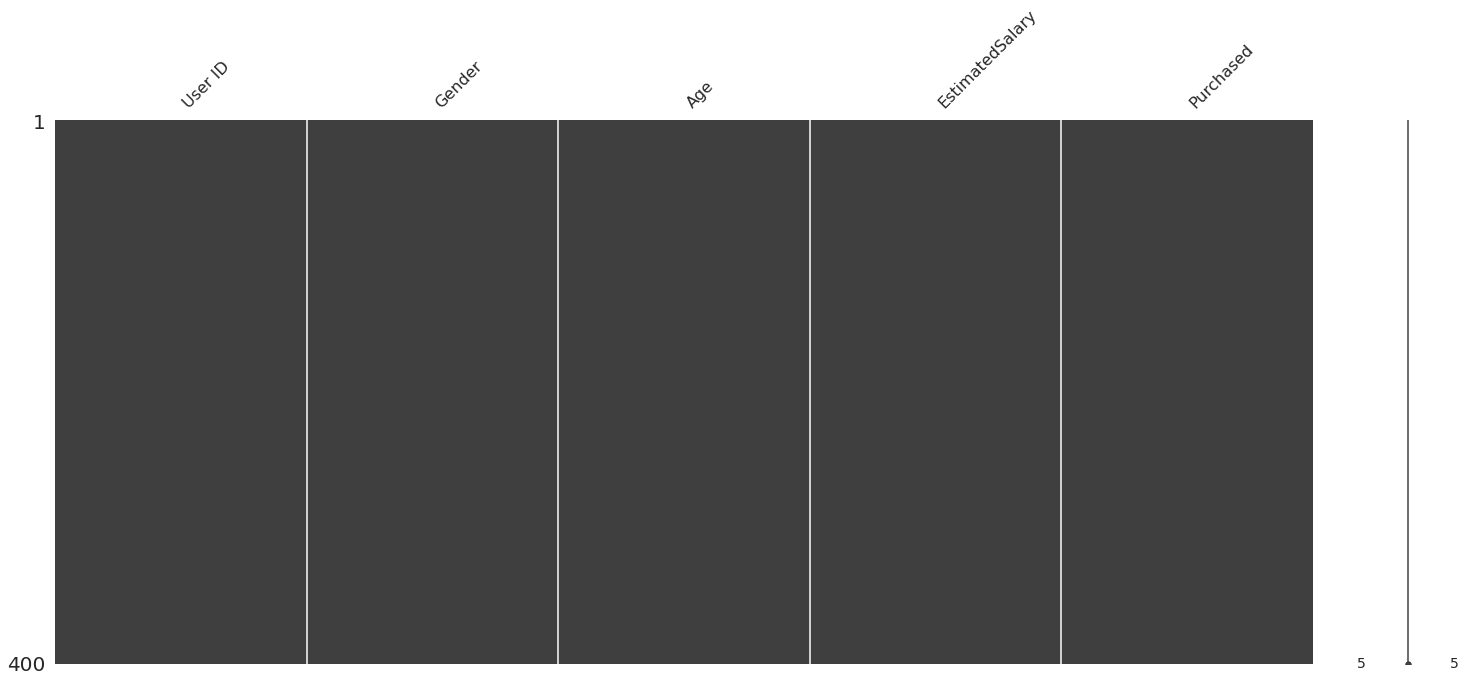

In [44]:
import missingno as msno

msno.matrix(df)

# Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

# Test Train Split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Creating Lists for graphs

In [47]:
accuracyScore = []
f1Score = []
precisionScore = []
recallScore = []
modelName = []

# Logistic Regression

Fitting Logistic Regression into training Set

In [48]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

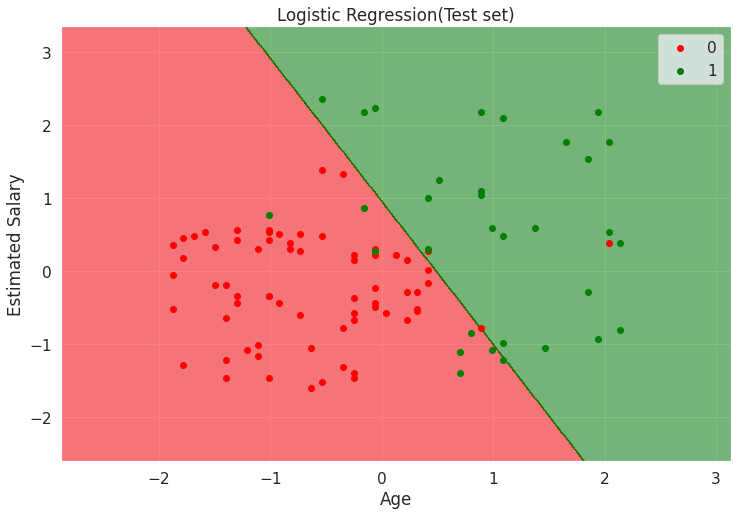

In [49]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize = (12,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Making the Confusion Matrix

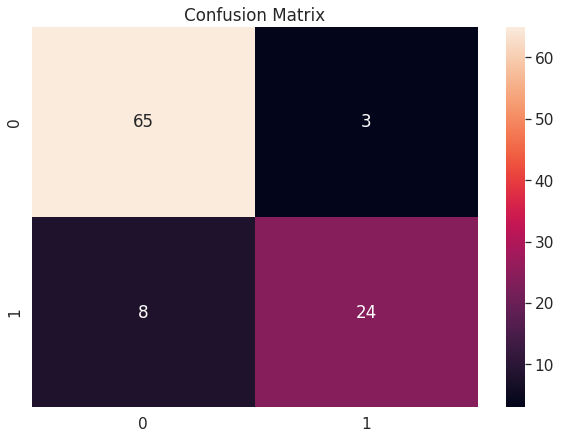

In [50]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True)
plt.show()

In [51]:
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)

print("Accuracy Score: ", ac)
print("F1 Score: ", f1)
print("Precision Score: ", pr)
print("Recall Score: ", re)

accuracyScore.append(ac)
f1Score.append(f1)
precisionScore.append(pr)
recallScore.append(re)
modelName.append('Logistic Regression')

Accuracy Score:  0.89
F1 Score:  0.8135593220338982
Precision Score:  0.8888888888888888
Recall Score:  0.75


# KNN Classification

Fitting KNN Classification

In [52]:
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

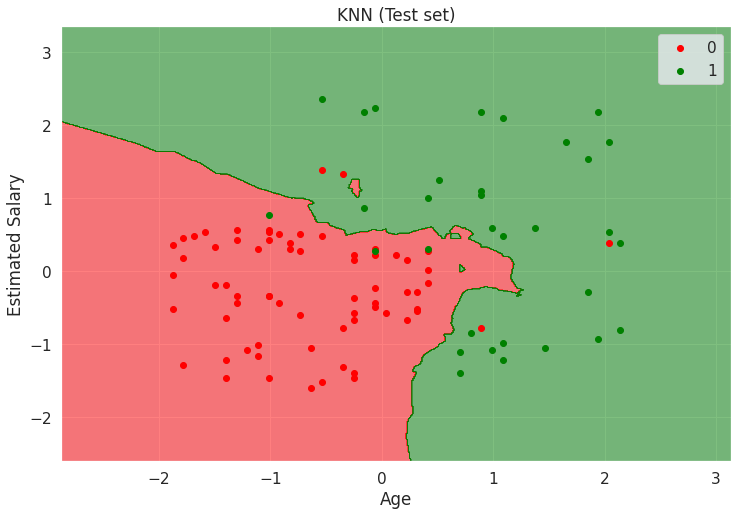

In [53]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize = (12,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Making the Confusion Matrix

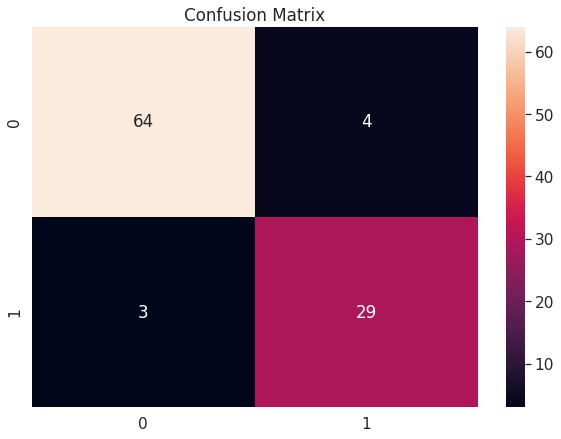

In [54]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True)
plt.show()

In [55]:
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)

print("Accuracy Score: ", ac)
print("F1 Score: ", f1)
print("Precision Score: ", pr)
print("Recall Score: ", re)

accuracyScore.append(ac)
f1Score.append(f1)
precisionScore.append(pr)
recallScore.append(re)
modelName.append('KNN')

Accuracy Score:  0.93
F1 Score:  0.8923076923076922
Precision Score:  0.8787878787878788
Recall Score:  0.90625


# Support Vector Machine

Fitting SVM

In [56]:
classifier=SVC(kernel='linear', random_state=0 )
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

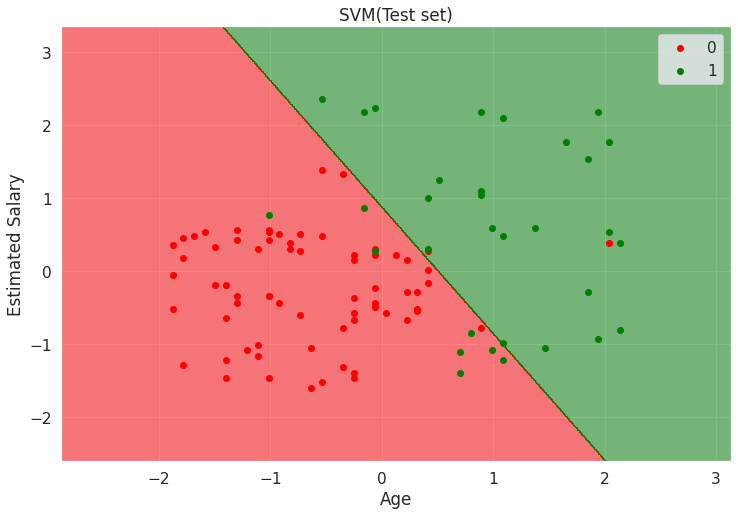

In [57]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize = (12,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Making the Confusion Matrix

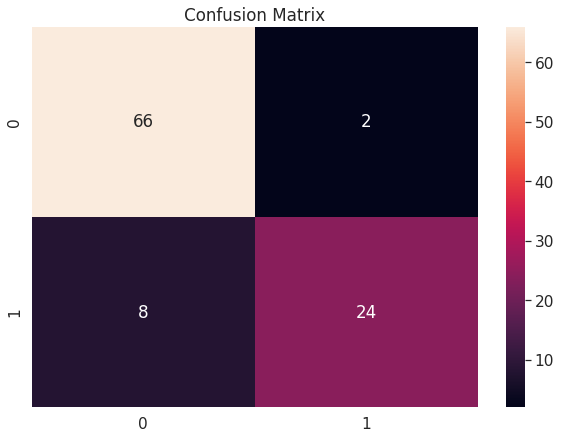

In [58]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True)
plt.show()

In [59]:
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)

print("Accuracy Score: ", ac)
print("F1 Score: ", f1)
print("Precision Score: ", pr)
print("Recall Score: ", re)

accuracyScore.append(ac)
f1Score.append(f1)
precisionScore.append(pr)
recallScore.append(re)
modelName.append('SVM')

Accuracy Score:  0.9
F1 Score:  0.8275862068965517
Precision Score:  0.9230769230769231
Recall Score:  0.75


# Kernel SVM

Fitting Kernel SVM

In [60]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

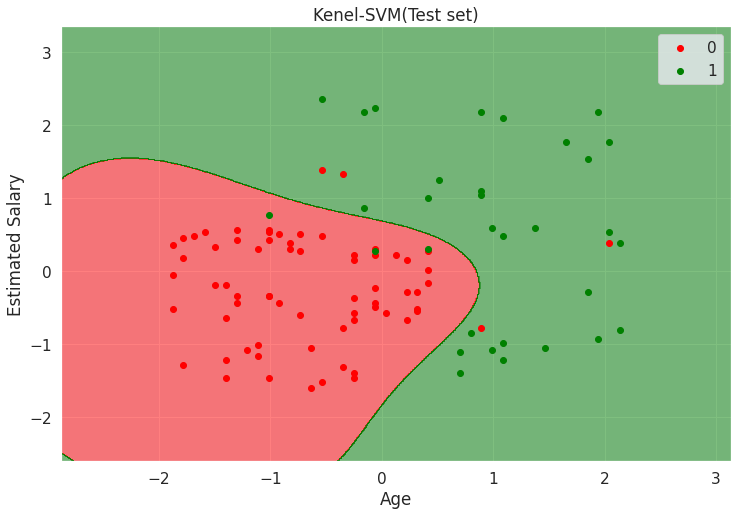

In [61]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize = (12,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Kenel-SVM(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Making the Confusion Matrix

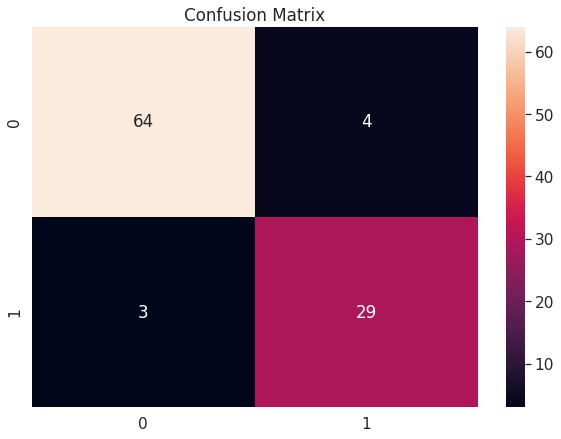

In [62]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True)
plt.show()

In [63]:
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)

print("Accuracy Score: ", ac)
print("F1 Score: ", f1)
print("Precision Score: ", pr)
print("Recall Score: ", re)

accuracyScore.append(ac)
f1Score.append(f1)
precisionScore.append(pr)
recallScore.append(re)
modelName.append('Kernel SVM')

Accuracy Score:  0.93
F1 Score:  0.8923076923076922
Precision Score:  0.8787878787878788
Recall Score:  0.90625


# Naive Bayes

Fitting Naive Bayes

In [64]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

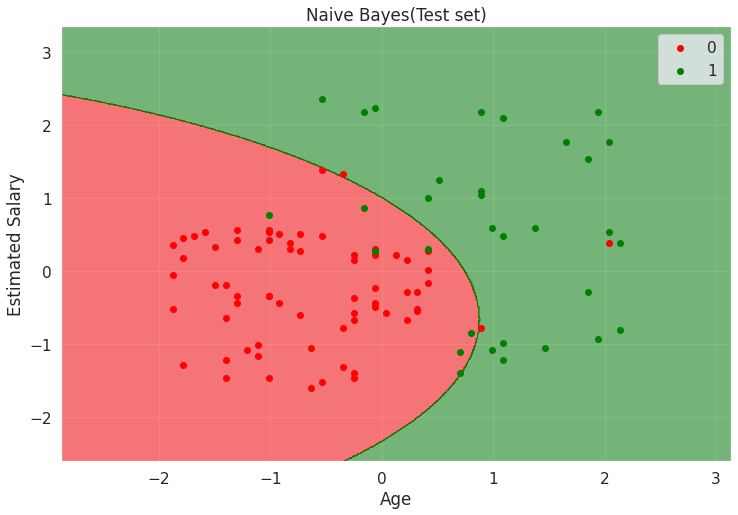

In [65]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize = (12,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Making the Confusion Matrix

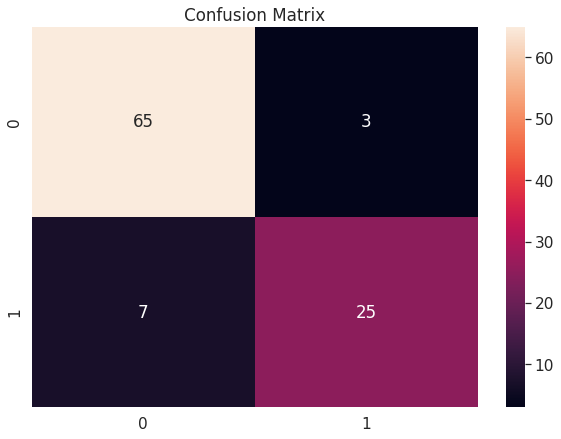

In [66]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True)
plt.show()

In [67]:
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)

print("Accuracy Score: ", ac)
print("F1 Score: ", f1)
print("Precision Score: ", pr)
print("Recall Score: ", re)

accuracyScore.append(ac)
f1Score.append(f1)
precisionScore.append(pr)
recallScore.append(re)
modelName.append('Naive Bayes')

Accuracy Score:  0.9
F1 Score:  0.8333333333333334
Precision Score:  0.8928571428571429
Recall Score:  0.78125


# Decision Tree Classifier

Fitting Decision Tree Classifier

In [68]:
classifier = DecisionTreeClassifier(random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

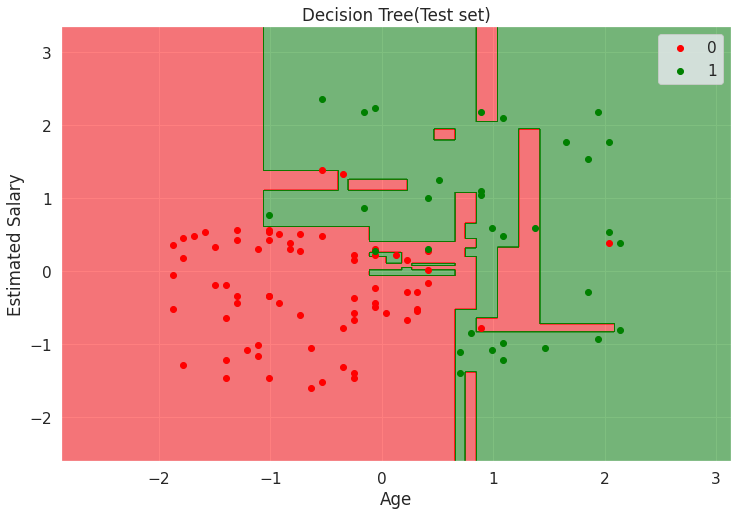

In [69]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize = (12,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Making the Confusion Matrix

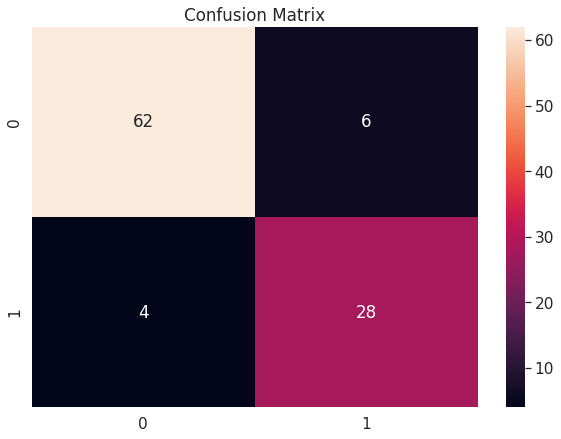

In [70]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True)
plt.show()

In [71]:
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)

print("Accuracy Score: ", ac)
print("F1 Score: ", f1)
print("Precision Score: ", pr)
print("Recall Score: ", re)

accuracyScore.append(ac)
f1Score.append(f1)
precisionScore.append(pr)
recallScore.append(re)
modelName.append('Decision Tree')

Accuracy Score:  0.9
F1 Score:  0.8484848484848485
Precision Score:  0.8235294117647058
Recall Score:  0.875


# Random Forest Classifier

Fitting Random Forest Classifier

In [72]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

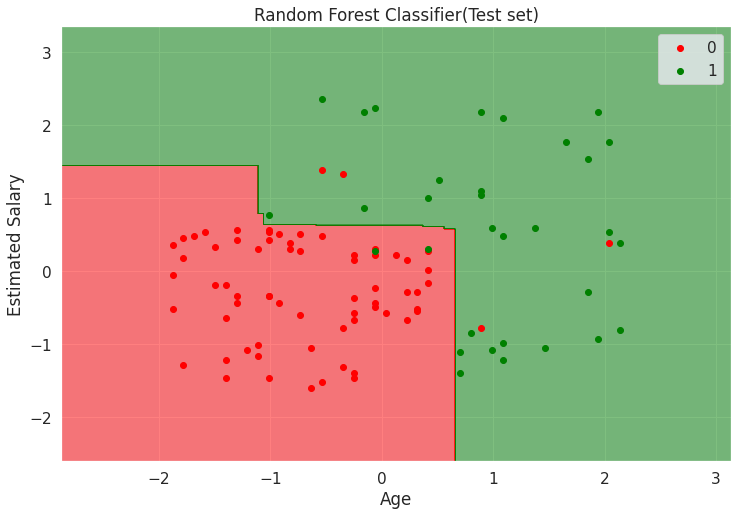

In [73]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize = (12,8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
alpha = 0.5, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
    c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classifier(Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Making the Confusion Matrix

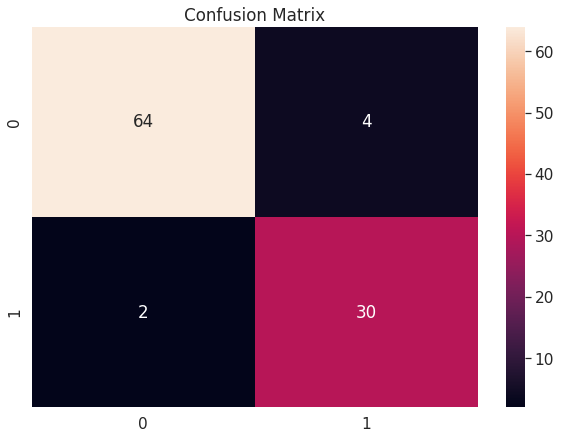

In [74]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
plt.title('Confusion Matrix')
sns.heatmap(cm, annot=True)
plt.show()

In [75]:
ac = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)

print("Accuracy Score: ", ac)
print("F1 Score: ", f1)
print("Precision Score: ", pr)
print("Recall Score: ", re)

accuracyScore.append(ac)
f1Score.append(f1)
precisionScore.append(pr)
recallScore.append(re)
modelName.append('Random Forest')

Accuracy Score:  0.94
F1 Score:  0.9090909090909091
Precision Score:  0.8823529411764706
Recall Score:  0.9375


In [76]:
accuracyScore = list(np.around(np.array(accuracyScore),2))
f1Score = list(np.around(np.array(f1Score),2))
precisionScore = list(np.around(np.array(precisionScore),2))
recallScore = list(np.around(np.array(recallScore),2))

In [77]:
fig = make_subplots(rows=2, cols=2,
                   subplot_titles=("Accuracy Score", "F1 Score", "Precision Score", "Recall Score"))

fig.add_trace(
    go.Bar(x=modelName, y=accuracyScore, texttemplate='%{y}', textposition='auto'),
    row=1, col=1
)
fig.add_trace(
    go.Bar(x=modelName, y=f1Score, texttemplate='%{y}', textposition='auto'),
    row=1, col=2
)
fig.add_trace(
    go.Bar(x=modelName, y=precisionScore, texttemplate='%{y}', textposition='auto'),
    row=2, col=1
)
fig.add_trace(
    go.Bar(x=modelName, y=recallScore, texttemplate='%{y}', textposition='auto'),
    row=2, col=2
)

fig.update_layout(
    title={
        'text': "Classification Algorithms Score",
        'x':0.5,
    },
    showlegend=False
)

fig.show()


In [78]:
fig = go.Figure(data=[
    go.Bar(name='Accuracy Score', x=modelName, y=accuracyScore),
    go.Bar(name='F1 Score', x=modelName, y=f1Score),
    go.Bar(name='Precision Score', x=modelName, y=precisionScore),
    go.Bar(name='Recall Score', x=modelName, y=recallScore)
])

fig.update_layout(
    barmode = 'group',
    title={
        'text': "Classification Algorithms Score",
        'x':0.5,
    },
)
fig.show()